Importowanie wszystkiego

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('IT Salary Survey EU (Responses) - Dec 2024.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Podstawowe czyszczenie danych:

In [ ]:
cols_to_process = ['Position', 'Seniority level', 'City', 'Main technology / programming language']
for col in cols_to_process:
    if col in df.columns:
        idx = df.columns.get_loc(col)
        if idx + 1 < len(df.columns):
            next_col = df.columns[idx + 1]
            mask = df[col] == 'Other'
            df.loc[mask, col] = df.loc[mask, next_col]

df['Age_group'] = pd.cut(df['Age'], bins=[0, 25, 30, 35, 40, 45, 50, 100],
                          labels=['<25', '25-29', '30-34', '35-39', '40-44', '45-49', '50+'])

def categorize_company_size(size):
    if pd.isna(size):
        return 'unknown'
    size_str = str(size)
    if 'up to 10' in size_str or '11-50' in size_str:
        return 'Małe (do 10)'
    elif '51-100' in size_str or '101-1000' in size_str:
        return 'Średnie (51-100)'
    else:
        return 'Duże (powyżej 100)'

if 'Company size' in df.columns:
    df['company_type'] = df['Company size'].apply(categorize_company_size)

if 'Other technologies/programming languages you use often' in df.columns:
    df['uses_any_tech'] = df['Other technologies/programming languages you use often'].notna().astype(int)


Wykresy:

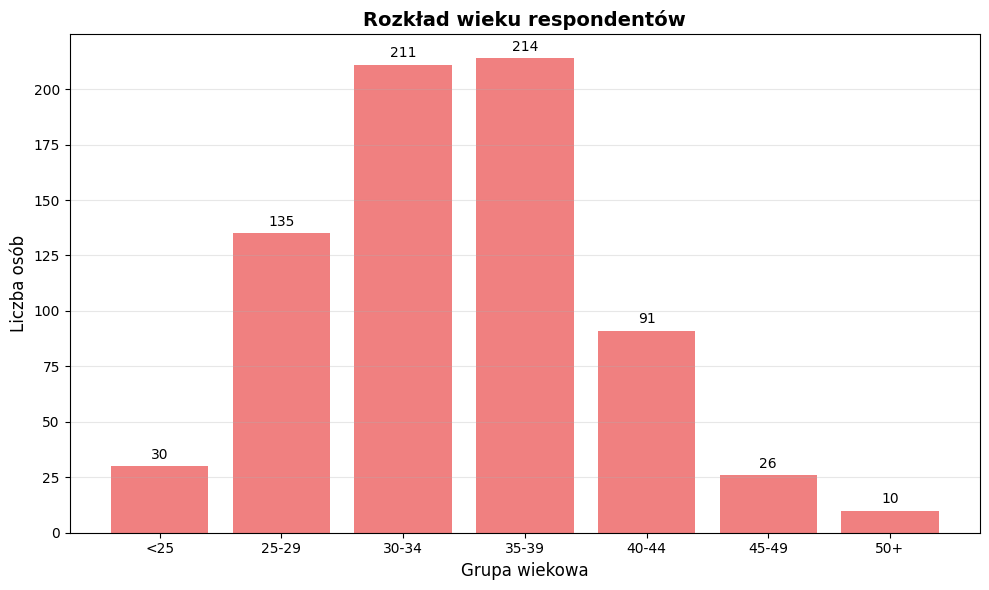

In [ ]:
plt.figure(figsize=(10, 6))
age_counts = df['Age_group'].value_counts().sort_index()
bars = plt.bar(age_counts.index.astype(str), age_counts.values, color='lightcoral')
plt.title('Rozkład wieku respondentów', fontsize=14, fontweight='bold')
plt.xlabel('Grupa wiekowa', fontsize=12)
plt.ylabel('Liczba osób', fontsize=12)
plt.grid(True, alpha=0.3, axis='y')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 2,
            f'{int(height)}', ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

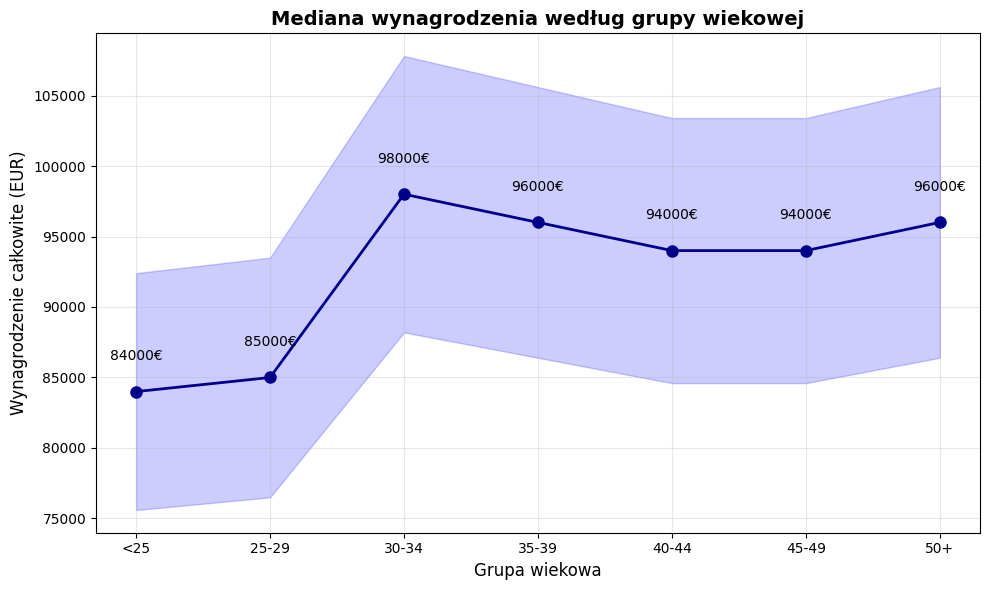

In [ ]:
plt.figure(figsize=(10, 6))
age_salary = df.groupby('Age_group', observed=True)['Annual Brutto salary with bonus and stocks in EUR'].median()
plt.plot(age_salary.index.astype(str), age_salary.values, marker='o',
        linewidth=2, markersize=8, color='darkblue')
plt.fill_between(age_salary.index.astype(str), age_salary.values * 0.9, age_salary.values * 1.1,
                alpha=0.2, color='blue')
plt.title('Mediana wynagrodzenia według grupy wiekowej', fontsize=14, fontweight='bold')
plt.xlabel('Grupa wiekowa', fontsize=12)
plt.ylabel('Wynagrodzenie całkowite (EUR)', fontsize=12)
plt.grid(True, alpha=0.3)
for i, salary in enumerate(age_salary.values):
    plt.text(i, salary + 2000, f'{salary:.0f}€', ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

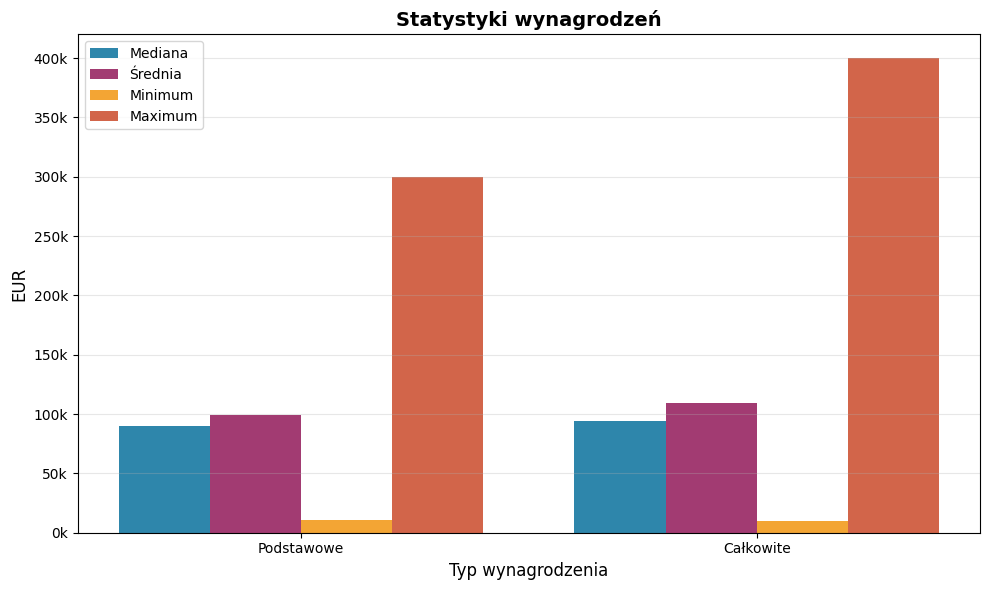

In [ ]:
if 'Annual gross salary without bonus and stocks in EUR' in df.columns and 'Annual Brutto salary with bonus and stocks in EUR' in df.columns:
    median_basic = df['Annual gross salary without bonus and stocks in EUR'].median()
    median_total = df['Annual Brutto salary with bonus and stocks in EUR'].median()

    stats_data = {
        'Podstawowe': {
            'Mediana': median_basic,
            'Średnia': df['Annual gross salary without bonus and stocks in EUR'].mean(),
            'Min': df['Annual gross salary without bonus and stocks in EUR'].min(),
            'Max': df['Annual gross salary without bonus and stocks in EUR'].max()
        },
        'Całkowite': {
            'Mediana': median_total,
            'Średnia': df['Annual Brutto salary with bonus and stocks in EUR'].mean(),
            'Min': df['Annual Brutto salary with bonus and stocks in EUR'].min(),
            'Max': df['Annual Brutto salary with bonus and stocks in EUR'].max()
        }
    }

    stats_df = pd.DataFrame(stats_data)

    plt.figure(figsize=(10, 6))
    x = np.arange(len(stats_df.columns))
    width = 0.2

    plt.bar(x - width*1.5, stats_df.loc['Mediana'], width, label='Mediana', color='#2E86AB')
    plt.bar(x - width*0.5, stats_df.loc['Średnia'], width, label='Średnia', color='#A23B72')
    plt.bar(x + width*0.5, stats_df.loc['Min'], width, label='Minimum', color='#F18F01', alpha=0.8)
    plt.bar(x + width*1.5, stats_df.loc['Max'], width, label='Maximum', color='#C73E1D', alpha=0.8)

    plt.xlabel('Typ wynagrodzenia', fontsize=12)
    plt.ylabel('EUR', fontsize=12)
    plt.title('Statystyki wynagrodzeń', fontsize=14, fontweight='bold')
    plt.xticks(x, stats_df.columns)
    plt.legend()
    plt.grid(True, alpha=0.3, axis='y')

    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x/1000)}k'))

    plt.tight_layout()
    plt.show()

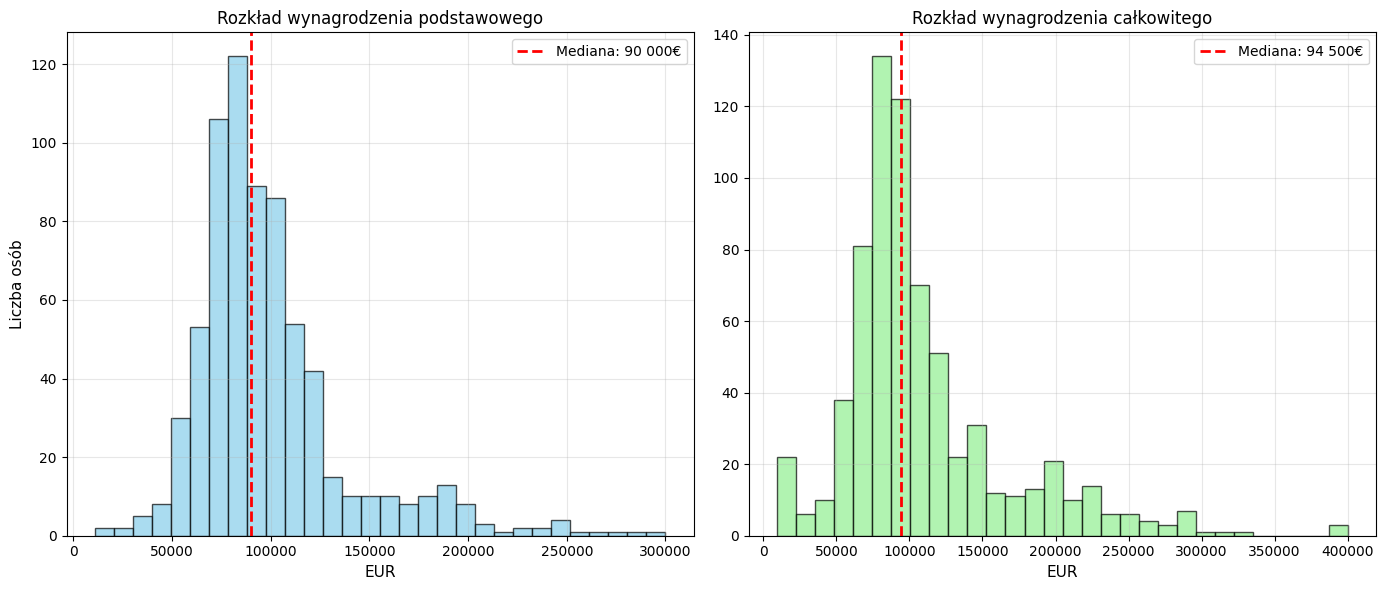

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.hist(df['Annual gross salary without bonus and stocks in EUR'], bins=30,
         edgecolor='black', alpha=0.7, color='skyblue')
ax1.set_title('Rozkład wynagrodzenia podstawowego', fontsize=12)
ax1.set_xlabel('EUR', fontsize=11)
ax1.set_ylabel('Liczba osób', fontsize=11)
ax1.axvline(median_basic, color='red', linestyle='--', linewidth=2,
           label=f'Mediana: {median_basic:,.0f}€'.replace(',', ' '))
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2.hist(df['Annual Brutto salary with bonus and stocks in EUR'], bins=30,
         edgecolor='black', alpha=0.7, color='lightgreen')
ax2.set_title('Rozkład wynagrodzenia całkowitego', fontsize=12)
ax2.set_xlabel('EUR', fontsize=11)
ax2.axvline(median_total, color='red', linestyle='--', linewidth=2,
           label=f'Mediana: {median_total:,.0f}€'.replace(',', ' '))
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


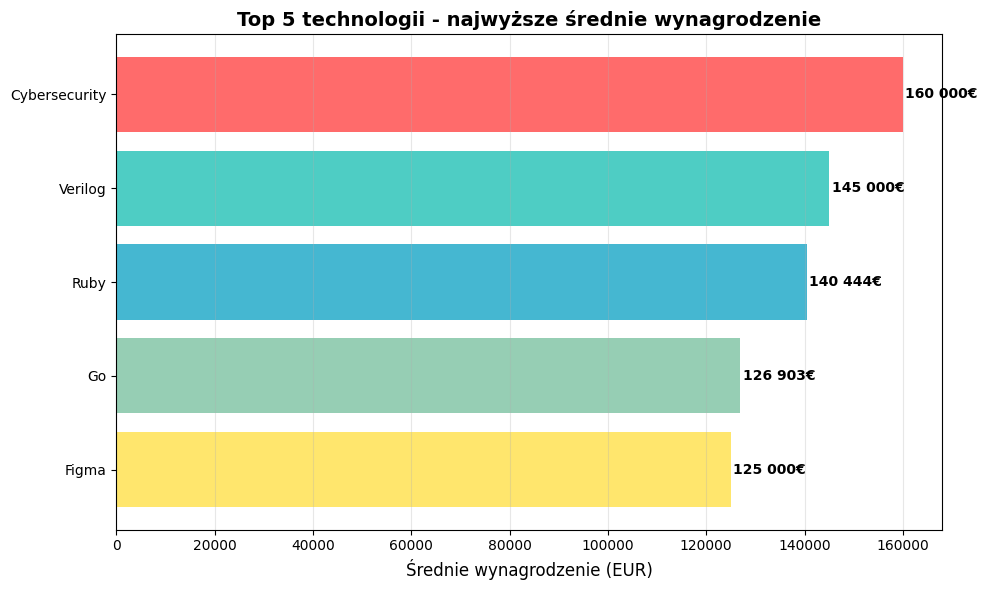

In [ ]:
if 'Main technology / programming language' in df.columns:
    tech_salary = df.groupby('Main technology / programming language', observed=True)[
        'Annual Brutto salary with bonus and stocks in EUR'].mean().sort_values(ascending=False).head(5)

    plt.figure(figsize=(10, 6))
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFE66D']
    bars = plt.barh(range(len(tech_salary)), tech_salary.values, color=colors)
    plt.yticks(range(len(tech_salary)), tech_salary.index)
    plt.xlabel('Średnie wynagrodzenie (EUR)', fontsize=12)
    plt.title('Top 5 technologii - najwyższe średnie wynagrodzenie', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.grid(True, alpha=0.3, axis='x')

    for i, (tech, salary) in enumerate(tech_salary.items()):
        plt.text(salary + 500, i, f'{salary:,.0f}€'.replace(',', ' '),
                va='center', fontsize=10, fontweight='bold')

    plt.tight_layout()
    plt.show()


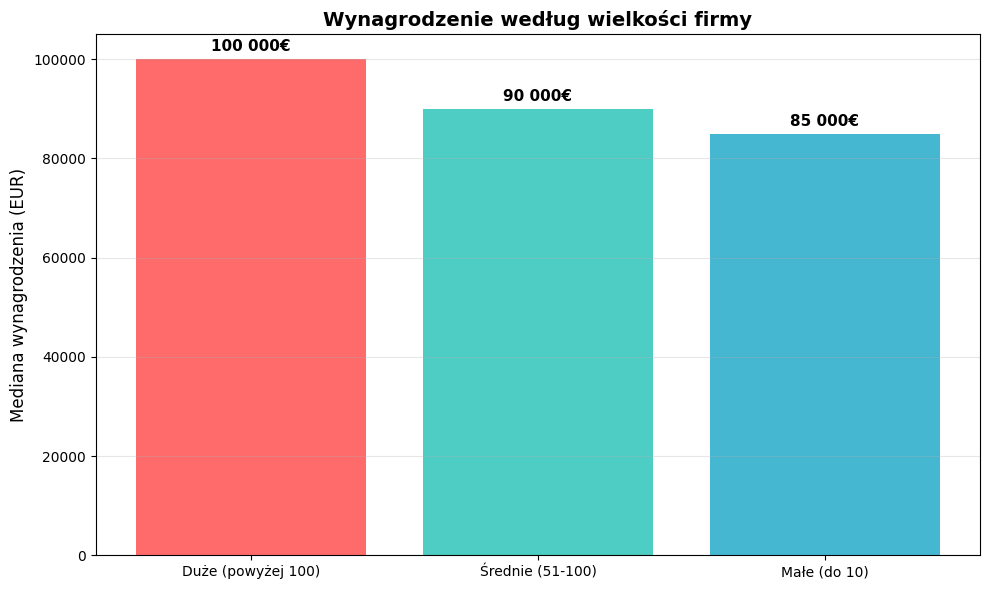

In [ ]:
if 'company_type' in df.columns:
    company_salary = df.groupby('company_type', observed=True)[
        'Annual Brutto salary with bonus and stocks in EUR'].median().sort_values(ascending=False)

    company_names = {'startup': 'Startup', 'scaleup': 'Scale-up', 'corporate': 'Korporacja'}
    company_salary.index = company_salary.index.map(lambda x: company_names.get(x, x))

    plt.figure(figsize=(10, 6))
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
    bars = plt.bar(range(len(company_salary)), company_salary.values, color=colors)
    plt.xticks(range(len(company_salary)), company_salary.index)
    plt.ylabel('Mediana wynagrodzenia (EUR)', fontsize=12)
    plt.title('Wynagrodzenie według wielkości firmy', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3, axis='y')

    for i, (company, salary) in enumerate(company_salary.items()):
        plt.text(i, salary + 1000, f'{salary:,.0f}€'.replace(',', ' '),
                ha='center', va='bottom', fontsize=11, fontweight='bold')

    plt.tight_layout()
    plt.show()

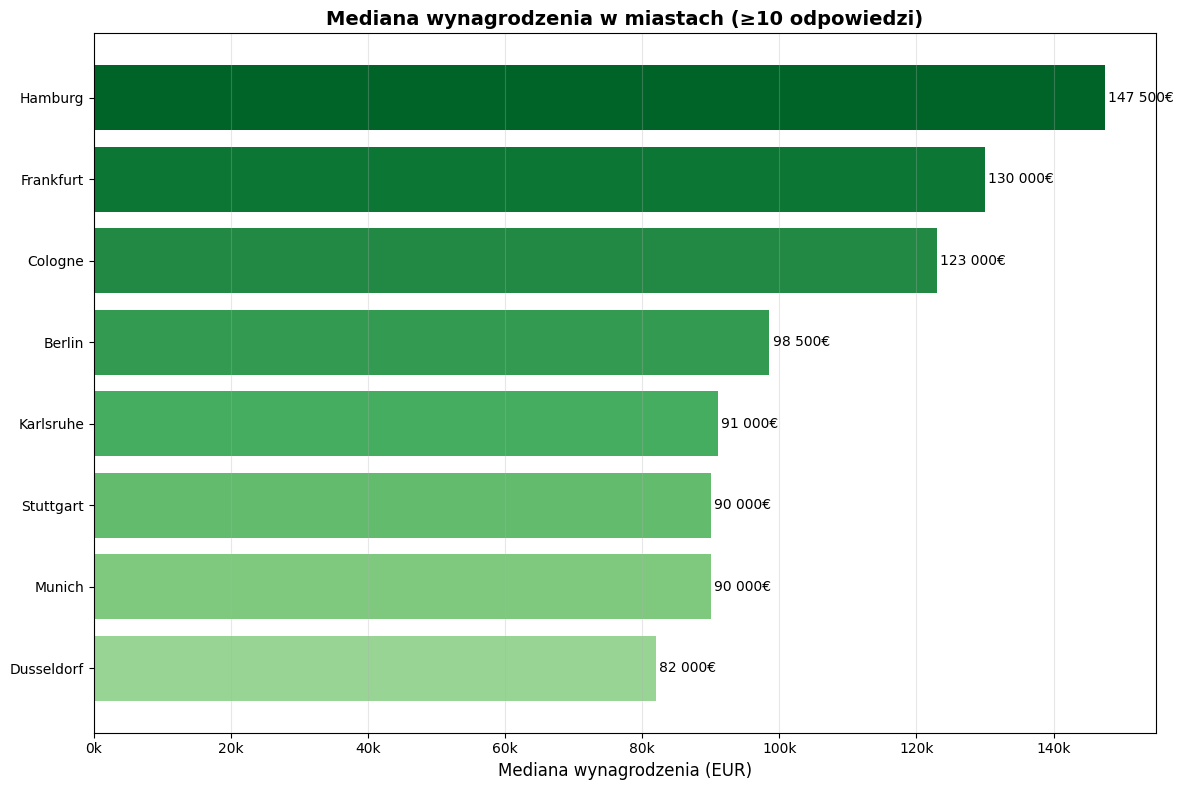

In [ ]:
if 'City' in df.columns:
    city_counts = df['City'].value_counts()
    significant_cities = city_counts[city_counts >= 10].index

    if len(significant_cities) > 0:
        df_significant = df[df['City'].isin(significant_cities)]

        city_salary_data = []
        city_labels = []

        for city in significant_cities:
            city_df = df_significant[df_significant['City'] == city]
            if len(city_df) > 0:
                median_salary = city_df['Annual Brutto salary with bonus and stocks in EUR'].median()
                city_salary_data.append(median_salary)
                city_labels.append(city)

        if city_salary_data:
            city_salary_series = pd.Series(city_salary_data, index=city_labels)
            city_salary_sorted = city_salary_series.sort_values(ascending=True)

            plt.figure(figsize=(12, 8))
            colors = plt.cm.Greens(np.linspace(0.4, 0.9, len(city_salary_sorted)))
            bars = plt.barh(range(len(city_salary_sorted)), city_salary_sorted.values, color=colors)

            plt.yticks(range(len(city_salary_sorted)), city_salary_sorted.index)
            plt.xlabel('Mediana wynagrodzenia (EUR)', fontsize=12)
            plt.title('Mediana wynagrodzenia w miastach (≥10 odpowiedzi)', fontsize=14, fontweight='bold')
            plt.grid(True, alpha=0.3, axis='x')

            plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x/1000)}k'))

            for i, salary in enumerate(city_salary_sorted.values):
                plt.text(salary + 500, i, f'{salary:,.0f}€'.replace(',', ' '),
                        va='center', fontsize=10)

            plt.tight_layout()
            plt.show()

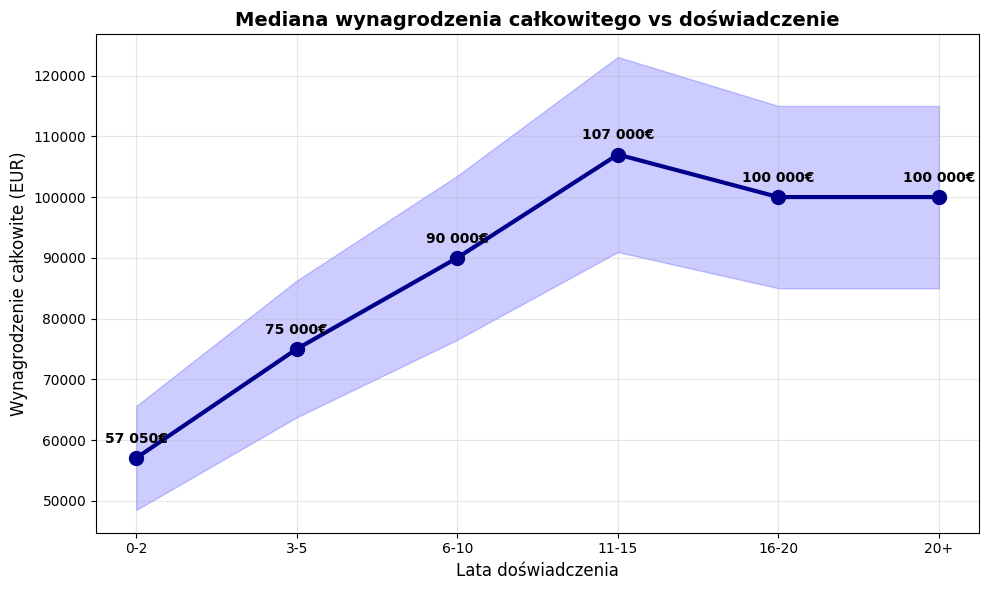

In [ ]:
df['Experience_group'] = pd.cut(df['Total years of experience'],
                                 bins=[0, 2, 5, 10, 15, 20, 100],
                                 labels=['0-2', '3-5', '6-10', '11-15', '16-20', '20+'])

exp_salary = df.groupby('Experience_group', observed=True)['Annual Brutto salary with bonus and stocks in EUR'].median()

plt.figure(figsize=(10, 6))
plt.plot(exp_salary.index.astype(str), exp_salary.values, marker='o',
        linewidth=3, markersize=10, color='darkblue')
plt.fill_between(exp_salary.index.astype(str), exp_salary.values * 0.85, exp_salary.values * 1.15,
                alpha=0.2, color='blue')
plt.title('Mediana wynagrodzenia całkowitego vs doświadczenie', fontsize=14, fontweight='bold')
plt.xlabel('Lata doświadczenia', fontsize=12)
plt.ylabel('Wynagrodzenie całkowite (EUR)', fontsize=12)
plt.grid(True, alpha=0.3)

for i, salary in enumerate(exp_salary.values):
    plt.text(i, salary + 2000, f'{salary:,.0f}€'.replace(',', ' '),
            ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

In [1]:
if 'Seniority level' in df.columns:
    # Utwórz kopię danych bez C-Level
    df_seniority = df.copy()
    
    # Znajdź wiersze z C-Level (różne warianty)
    c_level_mask = (
        df_seniority['Seniority level'].astype(str).str.contains('C-Level', case=False, na=False) |
        df_seniority['Seniority level'].astype(str).str.contains('C Level', case=False, na=False) |
        df_seniority['Seniority level'].astype(str).str.contains('clevel', case=False, na=False)
    )
    
    # Usuń te wiersze
    df_seniority = df_seniority[~c_level_mask]
    
    seniority_salary = df_seniority.groupby('Seniority level', observed=True)[
        'Annual Brutto salary with bonus and stocks in EUR'].median().sort_values(ascending=False)
    
    seniority_mapping = {
        'Intern': 'Stażysta',
        'Junior': 'Junior',
        'Mid-level': 'Mid-level',
        'Senior': 'Senior',
        'Staff / Lead / Manager': 'Staff/Lead/Manager',
        'Senior Staff / Director': 'Senior Staff/Director',
        'Other': 'Inne'
    }
    
    seniority_salary.index = seniority_salary.index.map(lambda x: seniority_mapping.get(x, x))
    seniority_salary = seniority_salary[seniority_salary.index.notna()]
    
    plt.figure(figsize=(10, 6))
    colors = plt.cm.viridis(np.linspace(0.2, 0.9, len(seniority_salary)))
    bars = plt.bar(range(len(seniority_salary)), seniority_salary.values, color=colors)

    plt.xticks(range(len(seniority_salary)), seniority_salary.index, rotation=45, ha='right')
    plt.ylabel('Mediana wynagrodzenia (EUR)', fontsize=12)
    plt.title('Wynagrodzenie według poziomu seniority', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3, axis='y')

    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x/1000)}k'))

    for i, (seniority, salary) in enumerate(seniority_salary.items()):
        plt.text(i, salary + 1000, f'{salary:,.0f}€'.replace(',', ' '),
                ha='center', va='bottom', fontsize=10, rotation=0)

    plt.tight_layout()
    plt.show()

NameError: name 'df' is not defined